In [ ]:
# Project Milestone 2
## Cleaning / Formatting Flat File Source
## Justin Wisniewski

In [7]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
# Importing Flat File Data
df = pd.read_csv('Desktop\pbp-2022.csv')

<AxesSubplot:>

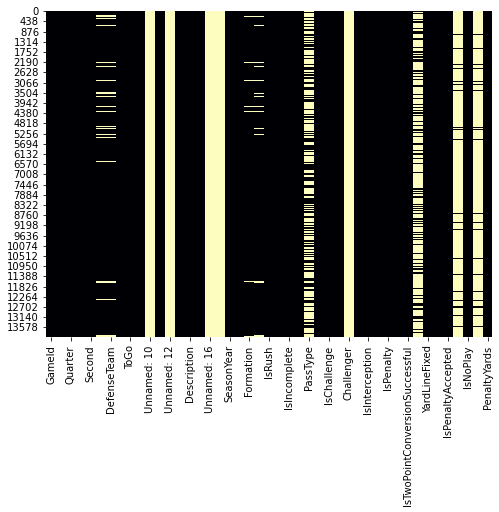

In [9]:
# Creating The Heatmap
plt.figure(figsize = (8,6))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')

In [12]:
# Iterating the columns
for col in df.columns:
    print(col)

GameId
GameDate
Quarter
Minute
Second
OffenseTeam
DefenseTeam
Down
ToGo
YardLine
Unnamed: 10
SeriesFirstDown
Unnamed: 12
NextScore
Description
TeamWin
Unnamed: 16
Unnamed: 17
SeasonYear
Yards
Formation
PlayType
IsRush
IsPass
IsIncomplete
IsTouchdown
PassType
IsSack
IsChallenge
IsChallengeReversed
Challenger
IsMeasurement
IsInterception
IsFumble
IsPenalty
IsTwoPointConversion
IsTwoPointConversionSuccessful
RushDirection
YardLineFixed
YardLineDirection
IsPenaltyAccepted
PenaltyTeam
IsNoPlay
PenaltyType
PenaltyYards


In [13]:
# Step 1
# Looking at the column names, there are four with no values associated as well as no name.  We will drop columns with no data.
df.drop(['Unnamed: 10', 'Unnamed: 12'], axis=1, inplace=True)

In [16]:
# Drop additional columns with no data
df.drop(['Unnamed: 16', 'Unnamed: 17'], axis=1, inplace=True)

In [33]:
# Confirm columns were dropped
for col in df.columns:
    print(col)

GameId
GameDate
Quarter
Minute
Second
OffenseTeam
DefenseTeam
Down
ToGo
YardLine
SeriesFirstDown
NextScore
Description
RefereeName
Yards
Formation
PlayType
IsRush
IsPass
IsIncomplete
IsTouchdown
PassType
IsSack
IsChallenge
IsChallengeReversed
Challenger
IsMeasurement
IsInterception
IsFumble
IsPenalty
IsTwoPointConversion
IsTwoPointConversionSuccessful
RushDirection
YardLineFixed
YardLineDirection
IsPenaltyAccepted
PenaltyTeam
IsNoPlay
Penalty
PenaltyYards
Referee


In [18]:
# Step 2
# Because this is primarily focused on penalties, we can drop rows with empty value (NaN) within PenaltyType
df = df.dropna(axis=0, subset=['PenaltyType'])

In [20]:
# Step 3
# Find duplicates within the remaining data and remove additional columns that will not need to be included
df.duplicated(subset=['TeamWin'])

0        False
1         True
17        True
27        True
47        True
         ...  
13812     True
13835     True
13864     True
13879     True
13912     True
Length: 1080, dtype: bool

In [31]:
# Step 4
# SeasonYear column will be replaced by the referee name, also shortened the PenaltyType simply to Penalty to clean up
df = df.rename(columns={'SeasonYear': 'RefereeName', 'PenaltyType': 'Penalty'})

In [50]:
# Step 5
# Add new column combining minute and second to get actual game clock
# Will need to add 0 in front of single number
df['Minute']=df['Minute'].astype(str)
df['Second']=df['Second'].astype(str)
df['Clock'] = df[['Minute', 'Second']].apply(lambda x: ':'.join(x), axis=1)

In [55]:
df

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,Penalty,PenaltyYards,Referee,Clock
0,2022100912,2022-10-09,4,4,6,LA,DAL,2,14,74,...,NaN,26,OPP,1,DAL,1,ENCROACHMENT,5,Name,4:6
1,2022100912,2022-10-09,4,4,10,LA,DAL,2,4,84,...,NaN,16,OPP,1,LA,1,OFFENSIVE HOLDING,10,Name,4:10
17,2022100912,2022-10-09,3,0,23,LA,DAL,2,10,71,...,RIGHT TACKLE,29,OPP,1,LA,1,OFFENSIVE HOLDING,10,Name,0:23
27,2022100912,2022-10-09,3,10,1,DAL,LA,3,4,64,...,NaN,36,OPP,0,LA,0,DEFENSIVE HOLDING,0,Name,10:1
47,2022100910,2022-10-09,4,4,36,SF,CAR,4,1,58,...,NaN,42,OPP,1,SF,1,DELAY OF GAME,5,Name,4:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13812,2022100910,2022-10-09,4,5,59,SF,CAR,1,10,49,...,RIGHT END,49,OWN,1,SF,1,OFFENSIVE HOLDING,10,Name,5:59
13835,2022100912,2022-10-09,2,5,22,DAL,LA,2,6,39,...,LEFT TACKLE,39,OWN,1,DAL,1,OFFENSIVE HOLDING,10,Name,5:22
13864,2022100912,2022-10-09,3,1,35,DAL,LA,3,1,14,...,RIGHT TACKLE,14,OWN,1,DAL,1,OFFENSIVE HOLDING,7,Name,1:35
13879,2022100912,2022-10-09,4,4,41,LA,DAL,1,10,44,...,NaN,44,OWN,1,DAL,0,ROUGHING THE PASSER,15,Name,4:41
